# Movimento de corpo rígido

A ideia é misturar o material do PDF da Prof Raquel com os códigos que ela disponibiliza para deixar o que é bom em algo melhor ainda.

Vamos utilizar bastante coordenadas homogêneas.

## Definindo algumas funções importantes

In [38]:
#@title Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np

In [39]:
#@title Definindo como o numpy vai mostrar os números
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.set_printoptions(precision=3,suppress=True)

In [40]:
#@title Função para definir os 'plots'
def set_plot(ax=None,figure = None,lim=[-2,2]):
    if figure ==None:
        figure = plt.figure(figsize=(8,8))
    if ax==None:
        ax = plt.axes(projection='3d')

    ax.set_title("Visão da Câmera")
    ax.set_xlim(lim)
    ax.set_xlabel("x axis")
    ax.set_ylim(lim)
    ax.set_ylabel("y axis")
    ax.set_zlim(lim)
    ax.set_zlabel("z axis")
    return ax

In [41]:
#@title Desenho de vetores
def draw_arrows(point,base,axis,length=1.5):
    # The object base is a matrix, where each column represents the vector
    # of one of the axis, written in homogeneous coordinates (ax,ay,az,0)


    # Plot vector of x-axis
    axis.quiver(point[0],point[1],point[2],base[0,0],base[1,0],base[2,0],color='red',pivot='tail',  length=length)
    # Plot vector of y-axis
    axis.quiver(point[0],point[1],point[2],base[0,1],base[1,1],base[2,1],color='green',pivot='tail',  length=length)
    # Plot vector of z-axis
    axis.quiver(point[0],point[1],point[2],base[0,2],base[1,2],base[2,2],color='blue',pivot='tail',  length=length)

    return axis

# Representação dos Vetores Base, ponto de origem e da Câmera em coordenadas homogêneas


In [42]:
# base vector values
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
base = np.hstack((e1,e2,e3))

print ('Cartesian base: \n',base)
#origin point
point = np.array([[0],[0],[0],[1]])

# You can also consider the camera as an object composed by its base and origin
# Then you can transform such object whenever you want to rotate or translate the camera
cam = np.hstack([base,point])


Cartesian base: 
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 0]]


# Movimento de corpo rígido

### Translação

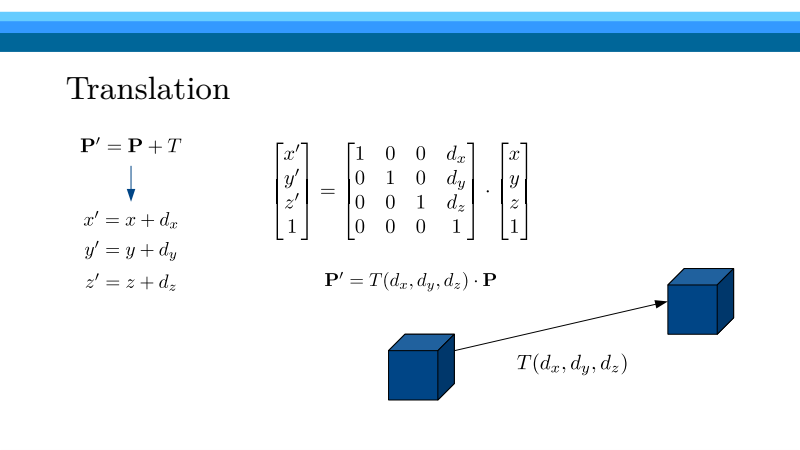

In [43]:
#@title Definindo a matriz de translação qualquer
translation = np.array([[1.0],[1.0],[1.0],[0.0]])
T = np.eye(4)
T[:,-1]=translation.T*2
T[3,3]=1
print('Translation Matrix: \n',T)


Translation Matrix: 
 [[1. 0. 0. 2.]
 [0. 1. 0. 2.]
 [0. 0. 1. 2.]
 [0. 0. 0. 1.]]


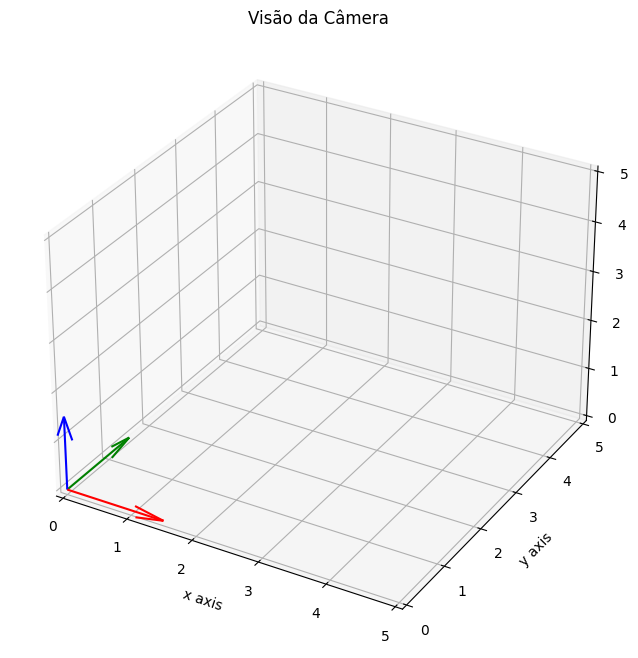

In [44]:
#@title Definido a origem e o plot
# Monstrando o ponto da origem e os vetores base.
axis = set_plot(lim=[0,5])
axis = draw_arrows(point,base,axis)

Point (0,0,0) translate by [1,1,1] using vector addition:
[[1.]
 [1.]
 [1.]
 [1.]]


<ipython-input-45-0e001400d89c>:11: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axis.dist=10


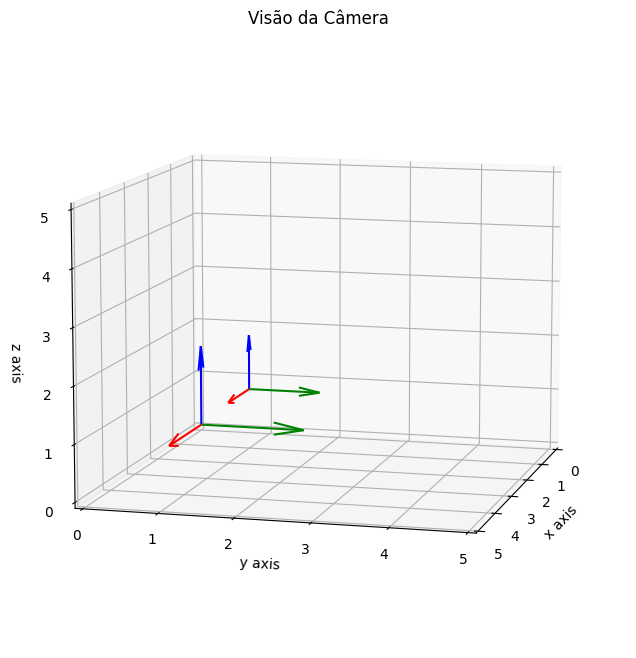

In [45]:
#@title Transladando como uma soma simples

translated_point = point+translation
print('Point (0,0,0) translate by [1,1,1] using vector addition:')
print(translated_point)
axis = set_plot(lim=[0,5])
axis = draw_arrows(point,base,axis)
axis = draw_arrows(translated_point,base,axis,length=1.0)
#set camera view options of a plot
axis.view_init(elev=10,azim=15)
axis.dist=10


Point (0,0,0) translated by [2,2,2] using homogeneous coordinates:
[[2.]
 [2.]
 [2.]
 [1.]]


<ipython-input-46-1f240bfc1d1b>:16: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axis.dist=10


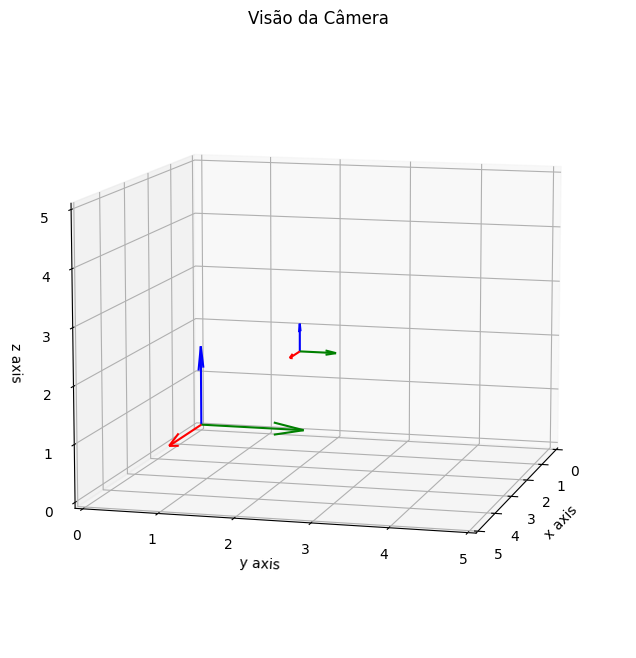

In [46]:
#@title Transladando como um produto interno utilizando coordenadas homogêneas

axis = set_plot(lim=[0,5])
axis = draw_arrows(point,base,axis)
translated_point_mult = np.dot(T,point)
print('Point (0,0,0) translated by [2,2,2] using homogeneous coordinates:')
print(translated_point_mult)
axis = draw_arrows(translated_point_mult,base,axis,length=0.5)


#set camera view options of a plot
#axis.view_init(elev=90,azim=0)
#axis.dist=7

axis.view_init(elev=10,azim=15)
axis.dist=10

plt.show()

### Rotation

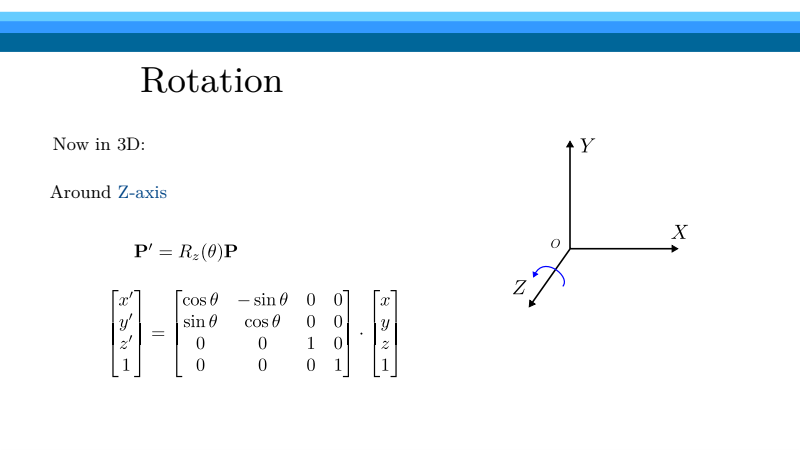

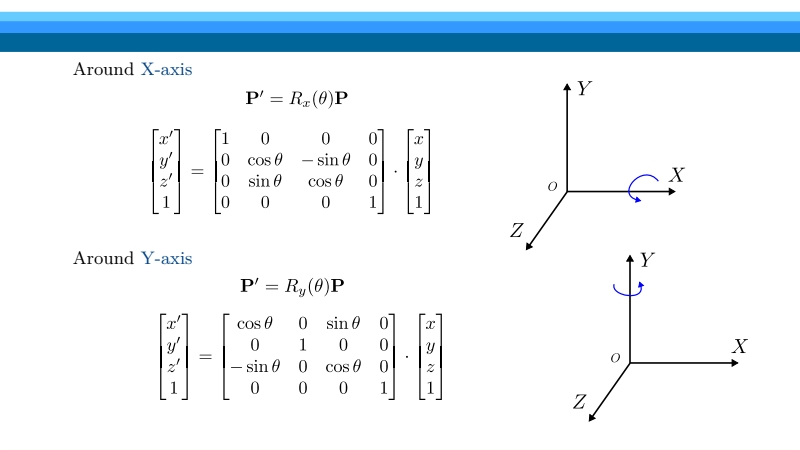

In [47]:
#@title Rotacionando nos eixos
from math import pi,cos,sin

def z_rotation(angle):
    rotation_matrix=np.array([[cos(angle),-sin(angle),0,0],
                              [sin(angle),cos(angle),0,0],
                              [0,0,1,0],
                              [0,0,0,1]])
    return rotation_matrix

def x_rotation(angle):
    rotation_matrix=np.array([[1,0,0,0],
                              [0, cos(angle),-sin(angle),0],
                              [0, sin(angle), cos(angle),0],
                              [0,0,0,1]])
    return rotation_matrix

def y_rotation(angle):
    rotation_matrix=np.array([[cos(angle),0, sin(angle),0],
                              [0,1,0,0],
                              [-sin(angle), 0, cos(angle),0],
                              [0,0,0,1]])
    return rotation_matrix


In [52]:
#@title { run: "auto" }
rotation_angle = -0.04 # @param {type:"slider", min:-3.14, max:3.14, step:0.1}
Rz = z_rotation(rotation_angle)
print('Rz:\n',Rz,'\n')
Rx = x_rotation(rotation_angle)
print('Rx:\n',Rx,'\n')
Ry = y_rotation(rotation_angle)
print('Ry:\n',Ry,'\n')

Rz:
 [[ 0.999  0.04   0.     0.   ]
 [-0.04   0.999  0.     0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]] 

Rx:
 [[ 1.     0.     0.     0.   ]
 [ 0.     0.999  0.04   0.   ]
 [ 0.    -0.04   0.999  0.   ]
 [ 0.     0.     0.     1.   ]] 

Ry:
 [[ 0.999  0.    -0.04   0.   ]
 [ 0.     1.     0.     0.   ]
 [ 0.04   0.     0.999  0.   ]
 [ 0.     0.     0.     1.   ]] 



Translation matrix:
[[1. 0. 0. 3.]
 [0. 1. 0. 3.]
 [0. 0. 1. 3.]
 [0. 0. 0. 1.]] 

Rotating the origin does not change anything
 [[0.]
 [0.]
 [0.]
 [1.]]
(4, 1)
Rotated base:
[[ 0.999  0.    -0.04 ]
 [ 0.     1.     0.   ]
 [ 0.04   0.     0.999]
 [ 0.     0.     0.   ]]
Rotated camera:
[[ 0.999  0.    -0.04   0.   ]
 [ 0.     1.     0.     0.   ]
 [ 0.04   0.     0.999  0.   ]
 [ 0.     0.     0.     1.   ]]
Rotated and translated camera:
[[ 0.999  0.    -0.04   3.   ]
 [ 0.     1.     0.     3.   ]
 [ 0.04   0.     0.999  3.   ]
 [ 0.     0.     0.     1.   ]]


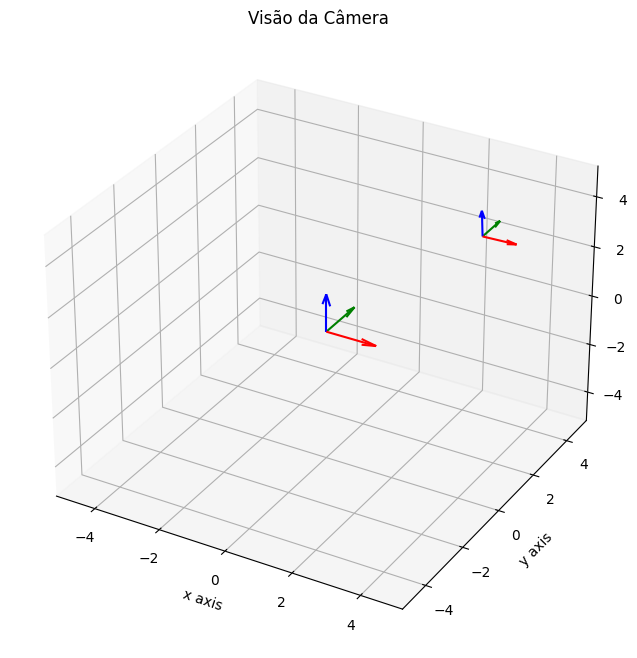

In [53]:
#@title Testando essa brincadeira



#original point
axis = set_plot(lim=[-5,5])
axis = draw_arrows(point,base,axis)

translation = np.array([3,3,3,1])

T = np.eye(4)
T[:,-1]=translation.T

print('Translation matrix:')
print(T,'\n')

R = Ry

rotated_point_mult = np.dot(R,point)

print('Rotating the origin does not change anything\n',rotated_point_mult)
print(rotated_point_mult.shape)

# Rotating the base attached to the point
base_rotated = np.dot(R,base)
cam_rotated = np.dot(R,cam)
print('Rotated base:')
print(base_rotated)

print('Rotated camera:')
print(cam_rotated)


#Translate the point

new_camera = np.dot(T,cam_rotated)
print('Rotated and translated camera:')
print(new_camera)


#changed length only for representation
axis = draw_arrows(new_camera[:,3],new_camera[:,0:3],axis,length=1.0)


#set camera view options of a plot
#axis.view_init(elev=90,azim=0)
#axis.dist=7

plt.show()


###Plotting an Object

In [ ]:
#Creating a house

house = np.array([[0,         0,         0],
         [0,  -10.0000,         0],
         [0, -10.0000,   12.0000],
         [0,  -10.4000,   11.5000],
         [0,   -5.0000,   16.0000],
         [0,         0,   12.0000],
         [0,    0.5000,   11.4000],
         [0,         0,   12.0000],
         [0,         0,         0],
  [-12.0000,         0,         0],
  [-12.0000,   -5.0000,         0],
  [-12.0000,  -10.0000,         0],
         [0,  -10.0000,         0],
         [0,  -10.0000,   12.0000],
[-12.0000,  -10.0000,   12.0000],
  [-12.0000,         0,   12.0000],
         [0,         0,   12.0000],
         [0,  -10.0000,   12.0000],
         [0,  -10.5000,   11.4000],
  [-12.0000,  -10.5000,   11.4000],
  [-12.0000,  -10.0000,   12.0000],
  [-12.0000,   -5.0000,   16.0000],
         [0,   -5.0000,   16.0000],
         [0,    0.5000,   11.4000],
  [-12.0000,    0.5000,   11.4000],
  [-12.0000,         0,   12.0000],
  [-12.0000,   -5.0000,   16.0000],
  [-12.0000,  -10.0000,   12.0000],
  [-12.0000,  -10.0000,         0],
  [-12.0000,   -5.0000,         0],
  [-12.0000,         0,         0],
  [-12.0000,         0,   12.0000],
  [-12.0000,         0,         0]])

house = np.transpose(house)
#print(house)
#print(house.shape)
#print(house[0,:])

#Plotting the house

figure = plt.figure(figsize=(15,15))
ax0 = plt.axes(projection='3d')
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')

#Representing the object in homogeneous coordinates
#create row of ones
num_columns = np.size(house,1)
ones_line = np.ones(num_columns)


#add to the house matrix to represent the house in homogeneous coordinates
house = np.vstack([house, ones_line])


### Translação

In [ ]:
#@title Funçção de translação
def move (dx,dy,dz):

    T = np.eye(4)
    T[0,-1]=dx
    T[1,-1]=dy
    T[2,-1]=dz
    return T


In [ ]:
# Useful function to create an 'equal' aspect ratio for 3D plots
def axisEqual3D(ax):
    extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
    sz = extents[:,1] - extents[:,0]
    centers = np.mean(extents, axis=1)
    maxsize = max(abs(sz))
    r = maxsize/2
    for ctr, dim in zip(centers, 'xyz'):
        getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)


In [ ]:
#@title Definindo a translação e aplicando em casas

T = move(10,4,10)
T1 = move(12,10,5)
print('Translation Matrix T: \n',T)
print('Translation Matrix T1: \n',T1)


#Translate the house
new_house = np.dot(T,house)

new_house2 = np.dot(T1,house)

# Criando a figura
figure = plt.figure(figsize=(30,15))
ax0 = figure.add_subplot(1,2,1, projection='3d')
#plot original house in red
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
#plot new house in blue
ax0.plot3D(new_house[0,:],new_house[1,:],new_house[2,:], 'blue')
ax0.plot3D(new_house2[0,:],new_house2[1,:],new_house2[2,:], 'magenta')
axisEqual3D(ax0)

In [ ]:
# Criando a figura
figure = plt.figure(figsize=(30,15))
ax0 = figure.add_subplot(1,2,1, projection='3d')

#Rotate the house along the z-axis
rotation_angle = pi/6 + pi/2#in radians
Rz = z_rotation(rotation_angle)
new_house2 = np.dot(Rz,new_house)
ax1 = figure.add_subplot(1,2,1, projection='3d')
#plot original house in red
ax1.plot3D(house[0,:], house[1,:], house[2,:], 'red')
ax1.plot3D(new_house[0,:],new_house[1,:],new_house[2,:], 'blue')
ax1.plot3D(new_house2[0,:],new_house2[1,:],new_house2[2,:], 'green')
ax1.set_aspect('equal')
#axisEqual3D(ax1)

In [ ]:
#Rotate the house along the z-axis
rotation_angle1 = pi/6 #in radians
rotation_angle2 = pi/3 #in radians

T1 = move(42,40,15)
Rz = z_rotation(rotation_angle1)
Rx = x_rotation(rotation_angle2)

house1 = np.dot(T1,house)
# new_house2 = Rx.Rz.house
new_house2 = np.dot(Rx,np.dot(Rz,house1))

# new_house3 = Rz.Rx.house
new_house3 = np.dot(Rz,np.dot(Rx,house1))

figure = plt.figure(figsize=(10,10))
ax0 = plt.axes(projection='3d')
ax0.scatter3D(42,40,15,'*')
ax0.scatter3D(0,0,0,'*')
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'magenta')
ax0.plot3D(house1[0,:], house1[1,:], house1[2,:], 'red')
ax0.plot3D(new_house2[0,:], new_house2[1,:], new_house2[2,:], 'blue')
ax0.plot3D(new_house3[0,:], new_house3[1,:], new_house3[2,:], 'green')
axisEqual3D(ax0)


M1 = np.dot(Rx,np.dot(Rz,T1))
M2 = np.dot(Rz,np.dot(Rx,T1))

new_house2 = np.dot(M1,house)
new_house3 = np.dot(M2,house)

figure = plt.figure(figsize=(10,10))
ax0 = plt.axes(projection='3d')
ax0.scatter3D(42,40,15,'*')
ax0.scatter3D(0,0,0,'*')
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'magenta')
ax0.plot3D(house1[0,:], house1[1,:], house1[2,:], 'red')
ax0.plot3D(new_house2[0,:], new_house2[1,:], new_house2[2,:], 'blue')
ax0.plot3D(new_house3[0,:], new_house3[1,:], new_house3[2,:], 'green')
axisEqual3D(ax0)

